In [2]:
from datascience import *
import numpy as np 

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from IPython.display import Image

# Lecture 7

## Class Data Survey

Please fill out the following survey before Wednesday's lecture:
https://forms.gle/wv67cXJN6o83vqDbA

We will use the data as a (hopefully) interesting case study for learning the `group` method next class. (Individuals will not be identified, and you are free to skip whatever questions you'd like.)

## Histograms

We will briefly review histograms. First, load the table of top movies from 2017, and add a column containing the age of each movie:

In [3]:
# Highest grossing movies as of 2017
top_movies = Table.read_table('data/top_movies_2017.csv')

# Add a column of ages
ages = 2023 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)

top_movies 

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,84
Star Wars,Fox,460998007,1583483200,1977,46
The Sound of Music,Fox,158671368,1266072700,1965,58
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,41
Titanic,Paramount,658672302,1204368000,1997,26
The Ten Commandments,Paramount,65500000,1164590000,1956,67
Jaws,Universal,260000000,1138620700,1975,48
Doctor Zhivago,MGM,111721910,1103564200,1965,58
The Exorcist,Warner Brothers,232906145,983226600,1973,50
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,86


Remember that *bins* are defined by an array, and we can use the `hist` method to visualize the distribution of ages with a histogram:

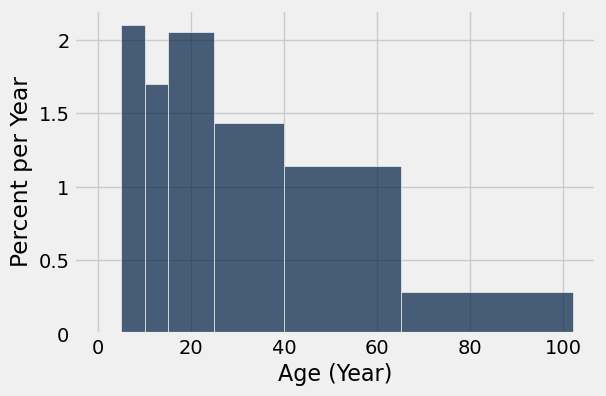

In [4]:
# Define the bins [0, 5), [5, 10), [10, 15), ..., [65, 102]
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 102)

top_movies.hist('Age', bins = my_bins, unit = 'Year')

If we don't want to specify bins ourselves, we can omit the `bins=my_bins` argument, and let Python select bins for us:

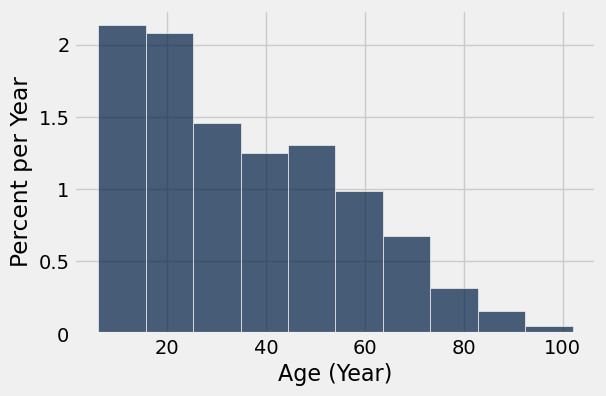

In [5]:
top_movies.hist('Age', unit = 'Year')

## Lists

Much like arrays, lists are another way of storing sequences in Python. You can create a new list using square brackets `[` and `]`:

In [6]:
# To create an array:
arr = make_array(1, 2, 3, 4, 10)

In [7]:
# To make a list:
L = [1, 2, 3, 4, 10]

In [8]:
# Define our first list
L = [42, 'capybara', min, make_array(1, 2, 3, 4)]

This list has 4 elements. You can confirm this using the `len` function:

In [9]:
len(L)

4

Individual elements of a list can also be accessed using square brackets:

In [12]:
arr.item(0) # Use item to access array entries

1

In [13]:
L.item(0) # Will this work?

AttributeError: 'list' object has no attribute 'item'

In [14]:
L[0]

42

In [15]:
L[1]

'capybara'

**Question:** the last element of `L` is an array. How can you look up the first element of this array?

In [18]:
L[3].item(0)

1

We can use lists to add new rows to a table. Let's load a table of top movies each year:

In [20]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,84
Star Wars,Fox,460998007,1583483200,1977,46
The Sound of Music,Fox,158671368,1266072700,1965,58
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,41
Titanic,Paramount,658672302,1204368000,1997,26
The Ten Commandments,Paramount,65500000,1164590000,1956,67
Jaws,Universal,260000000,1138620700,1975,48
Doctor Zhivago,MGM,111721910,1103564200,1965,58
The Exorcist,Warner Brothers,232906145,983226600,1973,50
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,86


In [25]:
new_row = ['Avatar', 'Sony', 2.9 * 10 ** 9, 2.9 * 10 ** 9, 2022, 1]
top_movies.with_row(new_row).sort('Age')

Title,Studio,Gross,Gross (Adjusted),Year,Age
Avatar,Sony,2.9e+09,2.9e+09,2022,1
Beauty and the Beast (2017),Buena Vista,5.04014e+08,5.04014e+08,2017,6
Wonder Woman,Warner Brothers,4.06382e+08,4.06382e+08,2017,6
Guardians of the Galaxy Vol. 2,Buena Vista,3.89397e+08,3.89397e+08,2017,6
Rogue One: A Star Wars Story,Buena Vista,5.32177e+08,5.37326e+08,2016,7
Finding Dory,Buena Vista,4.86296e+08,4.99245e+08,2016,7
Captain America: Civil War,Buena Vista,4.08084e+08,4.15654e+08,2016,7
The Secret Life of Pets,Universal,3.68384e+08,3.84704e+08,2016,7
Deadpool,Fox,3.63071e+08,3.75985e+08,2016,7
The Jungle Book (2016),Buena Vista,3.64001e+08,3.70808e+08,2016,7


## Functions ##

Let's start out by defining a simple function. Given an array of numbers `values`, define `spread(values)` to be the difference between the max and min value:

In [29]:
# A normal Python comment

In [27]:
def spread(arr):
    """
    Takes a set of values and computes the difference between the max and min value.
    (Using triple quotes, I can write a string on multiple lines.)
    This string serves as a comment, called a 'docstring.'
    """
    return max(arr) - min(arr)

In [30]:
help(spread)

Help on function spread in module __main__:

spread(values)
    Takes a set of values and computes the difference between the max and min value.
    (Using triple quotes, I can write a string on multiple lines.)
    This string serves as a comment, called a 'docstring.'



In [28]:
ages = make_array(18, 20, 22, 32)
spread(ages)

14

Here's another example of a function:

**Question:** define a function `triple` that takes a single input `x` and triples its value:

In [31]:
def triple(x):
    return x * 3

In [32]:
triple(3)

9

In [33]:
num = 4
triple(num)

12

In [34]:
triple(num * 5)

60

**Discussion question:** What does the function below do?
What kind of input does it take?
What output will it give?
What's a reasonable name?

In [36]:
def percentages(s):
    percents = s / sum(s) * 100  # Define percents on a new line
    return np.round(percents, 2)

In [37]:
s = make_array(1.1, 1.2, 5.0)
percentages(s)

array([ 15.07,  16.44,  68.49])

In [38]:
percents # Doesn't work

NameError: name 'percents' is not defined

In [ ]:
# What does this function do?
# Calculating percentages

# What kind of input is reasonable for s?
# An array of numbers!

In [ ]:
# Suggestion: try breaking up the function into several steps
# Test out what each step does with different values of s
# ...

Functions can also take in multiple arguments! Remember the Pythagorean Theorem? Let's define a function to compute the hypotenuse length for a right triangle with side lengths $x$ and $y$:

$ h = \sqrt{ x^2 + y^2 } $

In [39]:
def hypotenuse(x, y):
    """
    Compute the length of the hypotenuse for a right triangle with side lengths x and y.
    """
    hypot_squared = x ** 2 + y ** 2
    return np.sqrt(hypot_squared)

In [40]:
hypotenuse(9, 12)

15.0

In [41]:
hypotenuse(2, 2)

2.8284271247461903

**Question:** If you drive $x$ miles in $t$ hours, then your average speed is $x / t$ miles per hour. Write a function called `average_speed` with two arguments `x` and `t` that returns average speed.

In [42]:
def average_speed(x, t):
    return x / t

In [43]:
average_speed(120, 2)

60.0

In [45]:
def add_strings(s, t):
    return s + t

add_strings('hello ', 'world')

'hello world'

In [46]:
s = make_array(1, 2, 3, 4)
t = make_array(5, 6, 7, 8)

add_strings(s, t)

array([ 6,  8, 10, 12])

## Apply

The table method `apply` calls a function on every entry of a column (or multiple columns), returning an array with the results. Let's look at some basic examples.

Earlier, we loaded the table of top movies as of 2017, then added a column containing the age of each movie:

In [48]:
# Load the table of top movies from 2017
# Remember this table doesn't have a column for movies ages---we had to calculate that ourselves
top_movies_without_age = Table.read_table('data/top_movies_2017.csv')

# Select only the top 10 movies so that we don't print out 200 rows
top10 = top_movies_without_age.sort('Gross (Adjusted)', descending=True).take(np.arange(10))
top10

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


One way to get a column of ages (which we did earlier in this notebook) is to first extract the column of years as an array:

In [49]:
ages = 2023 - top10.column('Year')
top10.with_column('Age', ages)  

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,84
Star Wars,Fox,460998007,1583483200,1977,46
The Sound of Music,Fox,158671368,1266072700,1965,58
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,41
Titanic,Paramount,658672302,1204368000,1997,26
The Ten Commandments,Paramount,65500000,1164590000,1956,67
Jaws,Universal,260000000,1138620700,1975,48
Doctor Zhivago,MGM,111721910,1103564200,1965,58
The Exorcist,Warner Brothers,232906145,983226600,1973,50
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,86


Another approach is to use the `apply` method.

**Question:** define a function called `get_age` which takes a single argument `movie_year` and returns the age of the movie.

In [50]:
def get_age(movie_year):
    return 2023 - movie_year

In [51]:
get_age(2022)

1

We can then **apply** our new `get_age` function to each row of the table, using the `apply` method:

In [52]:
# Apply takes two (or more) arguments:
# First is the name of the function to apply 
# The remaining arguments are names of columns that we are applying the function to
ages = top10.apply(get_age, 'Year')
ages

array([84, 46, 58, 41, 26, 67, 48, 58, 50, 86])

In [53]:
# Again, use the with_column method to add the new ages array as a column of the table
top10.with_column('Age', ages)

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,84
Star Wars,Fox,460998007,1583483200,1977,46
The Sound of Music,Fox,158671368,1266072700,1965,58
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,41
Titanic,Paramount,658672302,1204368000,1997,26
The Ten Commandments,Paramount,65500000,1164590000,1956,67
Jaws,Universal,260000000,1138620700,1975,48
Doctor Zhivago,MGM,111721910,1103564200,1965,58
The Exorcist,Warner Brothers,232906145,983226600,1973,50
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,86


The `apply` method also works with functions that take several arguments.

In [54]:
def get_movie_info(title, gross_adj, year):
    """
    Create a string explaining some basic information about a movie.
    Takes 3 arguments: the movie title, adjusted gross earnings, and year as arguments.
    """
    age = 2023 - year
    millions = gross_adj / 1000000
    millions_rounded_down = int(millions)
    return 'The movie ' + title + ' is ' + str(age) + ' years old and made over $' + str(millions_rounded_down) + ' million'

In [55]:
# Since get_movie_info takes 3 arguments, we need to name 3 columns in the apply function:
top10.apply(get_movie_info, 'Title', 'Gross (Adjusted)', 'Year')

array([ 'The movie Gone with the Wind is 84 years old and made over $1796 million',
       'The movie Star Wars is 46 years old and made over $1583 million',
       'The movie The Sound of Music is 58 years old and made over $1266 million',
       'The movie E.T.: The Extra-Terrestrial is 41 years old and made over $1261 million',
       'The movie Titanic is 26 years old and made over $1204 million',
       'The movie The Ten Commandments is 67 years old and made over $1164 million',
       'The movie Jaws is 48 years old and made over $1138 million',
       'The movie Doctor Zhivago is 58 years old and made over $1103 million',
       'The movie The Exorcist is 50 years old and made over $983 million',
       'The movie Snow White and the Seven Dwarves is 86 years old and made over $969 million'],
      dtype='<U85')

The order of columns matters! If the order of columns doesn't match the function signature `get_movie_info(title, gross_adj, year)`, then problems can occur:

In [56]:
# Apply get_movie_info again, but with the columns out of order
top10.apply(get_movie_info, 'Title', 'Year', 'Gross (Adjusted)')

array([ 'The movie Gone with the Wind is -1796174677 years old and made over $0 million',
       'The movie Star Wars is -1583481177 years old and made over $0 million',
       'The movie The Sound of Music is -1266070677 years old and made over $0 million',
       'The movie E.T.: The Extra-Terrestrial is -1261082977 years old and made over $0 million',
       'The movie Titanic is -1204365977 years old and made over $0 million',
       'The movie The Ten Commandments is -1164587977 years old and made over $0 million',
       'The movie Jaws is -1138618677 years old and made over $0 million',
       'The movie Doctor Zhivago is -1103562177 years old and made over $0 million',
       'The movie The Exorcist is -983224577 years old and made over $0 million',
       'The movie Snow White and the Seven Dwarves is -969007977 years old and made over $0 million'],
      dtype='<U91')

## Challenge Questions

Suppose that we are investigating different models of hybrid cars. A table of hybrid car specs can be read in from `data/cars2016.csv`:

In [57]:
cars = Table.read_table('data/cars2016.csv')
cars

name,height,length,width,brand,city_mpg,highway_mpg,transmission_type,engine_torque,engine_horsepower,year,is_hybrid
2009 Audi A3 3.2,140,143,202,Audi,18,25,Automatic transmission,236,250,2009,True
2009 Audi A3 2.0 T AT,140,143,202,Audi,22,28,Automatic transmission,207,200,2009,True
2009 Audi A3 2.0 T,140,143,202,Audi,21,30,Manual transmission,207,200,2009,True
2009 Audi A3 2.0 T Quattro,140,143,202,Audi,21,28,Automatic transmission,207,200,2009,True
2009 Audi A3 2.0 T Quattro,140,143,202,Audi,21,28,Automatic transmission,207,200,2009,True
2009 Audi A5 3.2,91,17,62,Audi,16,27,Manual transmission,243,265,2009,True
2009 Audi A5 3.2 AT,91,17,62,Audi,17,26,Automatic transmission,243,265,2009,True
2009 Audi Q7 4.2,201,221,191,Audi,13,18,Automatic transmission,325,350,2009,True
2009 Audi Q7 3.6,201,221,191,Audi,14,20,Automatic transmission,266,280,2009,True
2009 Audi A4 Sedan 2.0 T Quattro,147,96,34,Audi,22,30,Manual transmission,258,211,2009,True


**Question 1:** generate a histogram to visualize the distribution of highway MPG for models from the year 2012.

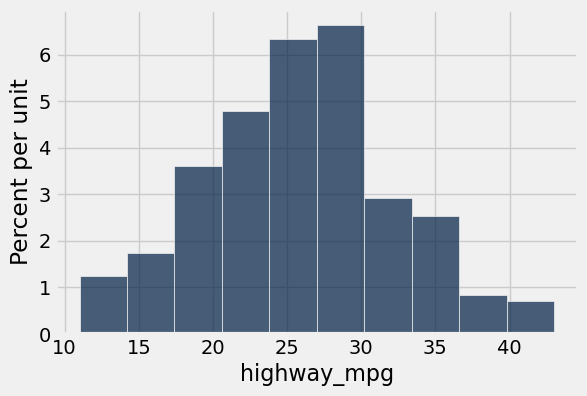

In [59]:
cars.where('year', are.equal_to(2012)).hist('highway_mpg')

The `cars` table has a column `year`, making it easy to select only rows from the year 2012. But it's not always this easy when working with real-world datasets. What if the `cars2016.csv` file didn't have a column for years? Let's drop this column using the `drop` method:

In [77]:
cars_without_year = cars.drop('year')
cars_without_year

name,height,length,width,brand,city_mpg,highway_mpg,transmission_type,engine_torque,engine_horsepower,is_hybrid
2009 Audi A3 3.2,140,143,202,Audi,18,25,Automatic transmission,236,250,True
2009 Audi A3 2.0 T AT,140,143,202,Audi,22,28,Automatic transmission,207,200,True
2009 Audi A3 2.0 T,140,143,202,Audi,21,30,Manual transmission,207,200,True
2009 Audi A3 2.0 T Quattro,140,143,202,Audi,21,28,Automatic transmission,207,200,True
2009 Audi A3 2.0 T Quattro,140,143,202,Audi,21,28,Automatic transmission,207,200,True
2009 Audi A5 3.2,91,17,62,Audi,16,27,Manual transmission,243,265,True
2009 Audi A5 3.2 AT,91,17,62,Audi,17,26,Automatic transmission,243,265,True
2009 Audi Q7 4.2,201,221,191,Audi,13,18,Automatic transmission,325,350,True
2009 Audi Q7 3.6,201,221,191,Audi,14,20,Automatic transmission,266,280,True
2009 Audi A4 Sedan 2.0 T Quattro,147,96,34,Audi,22,30,Manual transmission,258,211,True


Can we still guess the year for each row in the table? Take a look at the `name` column! Let's look at the value of `name` for several rows in the table:

In [78]:
names_array = cars_without_year.column('name')
print(names_array.item(0))
print(names_array.item(100))
print(names_array.item(1000))
print(names_array.item(5000))

2009 Audi A3 3.2
2012 Audi A3 2.0 T
2009 Nissan Pathfinder S 4x4
2012 Buick Verano Convenience Group


Do you see a pattern?

Given a string `s` with multiple words (separated by spaces), you can use the string method `s.split()` to get a list of each word:

In [71]:
"2009 Audi A3 3.2".split()

['2009', 'Audi', 'A3', '3.2']

**Question 2:** define a function called `get_year` with a single argument `name`. The function should take a name from the `cars` table, e.g. "2009 Audi A3 3.2", and return a reasonable guess for the year of the car, as an int. 

In [79]:
def get_year(name):
    words_in_name = name.split()       # Get a list with each "word" in the string name
    year_as_string = words_in_name[0]  # The first "word" is usually the year, as a string
    return int(year_as_string)         # Convert the string to an int and return it

In [73]:
# Test it out:
get_year("2009 Audi A3 3.2")

2009

**Question 3:** using the `apply` method and your new `get_year` function, create an array of ints called `inferred_years`. Add this array to the `cars_without_year` table as a column called `inferred_year`.

In [81]:
inferred_years = cars_without_year.apply(get_year, 'name')
cars_without_year = cars_without_year.with_column('inferred_year', inferred_years)
cars_without_year

name,height,length,width,brand,city_mpg,highway_mpg,transmission_type,engine_torque,engine_horsepower,is_hybrid,inferred_year
2009 Audi A3 3.2,140,143,202,Audi,18,25,Automatic transmission,236,250,True,2009
2009 Audi A3 2.0 T AT,140,143,202,Audi,22,28,Automatic transmission,207,200,True,2009
2009 Audi A3 2.0 T,140,143,202,Audi,21,30,Manual transmission,207,200,True,2009
2009 Audi A3 2.0 T Quattro,140,143,202,Audi,21,28,Automatic transmission,207,200,True,2009
2009 Audi A3 2.0 T Quattro,140,143,202,Audi,21,28,Automatic transmission,207,200,True,2009
2009 Audi A5 3.2,91,17,62,Audi,16,27,Manual transmission,243,265,True,2009
2009 Audi A5 3.2 AT,91,17,62,Audi,17,26,Automatic transmission,243,265,True,2009
2009 Audi Q7 4.2,201,221,191,Audi,13,18,Automatic transmission,325,350,True,2009
2009 Audi Q7 3.6,201,221,191,Audi,14,20,Automatic transmission,266,280,True,2009
2009 Audi A4 Sedan 2.0 T Quattro,147,96,34,Audi,22,30,Manual transmission,258,211,True,2009


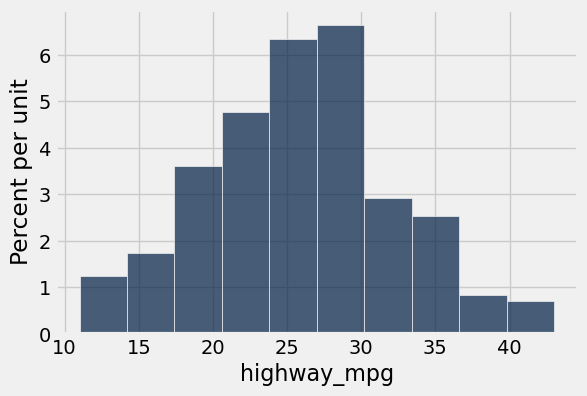

In [84]:
# Try out the histogram of highway MPGs for 2012 again, using our guesses for year instead. Does it look the same?
cars_without_year.where('inferred_year', are.equal_to(2012)).hist('highway_mpg')

Instead of highway MPG, let's look at *combined MPG*. The EPA defines combined MPG as a specific weighted average of city MPG and highway MPG. Given numbers `city_mpg` and `highway_mpg`, the formula is `combined_mpg = 0.55 * city_mpg + 0.45 * highway_mpg`.

**Question 4:** by defining your own function to calculate `combined_mpg` from two arguments, and using the `apply` method, create an array of combined MPGs. Add this array to the `cars_without_year` table as a column called `combined_mpg`.

In [86]:
# First define the combined_mpg function:

def combined_mpg(city_mpg, highway_mpg):
    """
    Calculate the EPA estimated combined MPG.
    """
    return 0.55 * city_mpg + 0.45 * highway_mpg

In [87]:
# Then use the apply method:
combined_mpgs = cars_without_year.apply(combined_mpg, 'city_mpg', 'highway_mpg')
cars_without_year = cars_without_year.with_column('combined_mpg', combined_mpgs)
cars_without_year

name,height,length,width,brand,city_mpg,highway_mpg,transmission_type,engine_torque,engine_horsepower,is_hybrid,inferred_year,combined_mpg
2009 Audi A3 3.2,140,143,202,Audi,18,25,Automatic transmission,236,250,True,2009,21.15
2009 Audi A3 2.0 T AT,140,143,202,Audi,22,28,Automatic transmission,207,200,True,2009,24.7
2009 Audi A3 2.0 T,140,143,202,Audi,21,30,Manual transmission,207,200,True,2009,25.05
2009 Audi A3 2.0 T Quattro,140,143,202,Audi,21,28,Automatic transmission,207,200,True,2009,24.15
2009 Audi A3 2.0 T Quattro,140,143,202,Audi,21,28,Automatic transmission,207,200,True,2009,24.15
2009 Audi A5 3.2,91,17,62,Audi,16,27,Manual transmission,243,265,True,2009,20.95
2009 Audi A5 3.2 AT,91,17,62,Audi,17,26,Automatic transmission,243,265,True,2009,21.05
2009 Audi Q7 4.2,201,221,191,Audi,13,18,Automatic transmission,325,350,True,2009,15.25
2009 Audi Q7 3.6,201,221,191,Audi,14,20,Automatic transmission,266,280,True,2009,16.7
2009 Audi A4 Sedan 2.0 T Quattro,147,96,34,Audi,22,30,Manual transmission,258,211,True,2009,25.6


**Bonus challenge question:** we've been careful to refer to the years in the `inferred_year` columns as guesses, since while our approach to guessing the years is reasonable, it might not be 100% accurate. Can you calculate the accuracy of our prediction (as a percentage)?

*Hint 1:* remember that the `inferred_year` column from the `cars_without_year` table contains our predictions, while the `year` column from the `cars` table contains the true years.

*Hint 2:* you can do this using the `apply` method, but remember that `apply` only works on a single table. Feel free to add extra columns to your tables as needed to answer this question.

*Hint 3:* I've provided a useful function below. It uses an `if` statement, which we have't learned about yet, but see if you can understand the behavior of this function anyway:

In [90]:
def numbers_are_equal(x, y):
    """
    Returns 1 if x and y are equal, and 0 otherwise.
    """
    if x == y:     # This is a "conditional statement." We will learn about them next week!
        return 1
    else:
        return 0

In [88]:
# Ultimately, we will want to use the apply method. Since this only works on a single table, let's first add the inferred_year column to the original cars table:
cars = cars.with_column('inferred_year', cars_without_year.column('inferred_year'))
cars

name,height,length,width,brand,city_mpg,highway_mpg,transmission_type,engine_torque,engine_horsepower,year,is_hybrid,inferred_year
2009 Audi A3 3.2,140,143,202,Audi,18,25,Automatic transmission,236,250,2009,True,2009
2009 Audi A3 2.0 T AT,140,143,202,Audi,22,28,Automatic transmission,207,200,2009,True,2009
2009 Audi A3 2.0 T,140,143,202,Audi,21,30,Manual transmission,207,200,2009,True,2009
2009 Audi A3 2.0 T Quattro,140,143,202,Audi,21,28,Automatic transmission,207,200,2009,True,2009
2009 Audi A3 2.0 T Quattro,140,143,202,Audi,21,28,Automatic transmission,207,200,2009,True,2009
2009 Audi A5 3.2,91,17,62,Audi,16,27,Manual transmission,243,265,2009,True,2009
2009 Audi A5 3.2 AT,91,17,62,Audi,17,26,Automatic transmission,243,265,2009,True,2009
2009 Audi Q7 4.2,201,221,191,Audi,13,18,Automatic transmission,325,350,2009,True,2009
2009 Audi Q7 3.6,201,221,191,Audi,14,20,Automatic transmission,266,280,2009,True,2009
2009 Audi A4 Sedan 2.0 T Quattro,147,96,34,Audi,22,30,Manual transmission,258,211,2009,True,2009


In [91]:
# Now we apply the numbers_are_equal function to the columns year and inferred_year.
# This will give us an array with values of 1 corresponding to correct rows, and 0 corresponding to incorrect rows.
row_is_correct = cars.apply(numbers_are_equal, 'year', 'inferred_year')

In [93]:
# To calculate the percent accuracy of our predictions for year, divide the number of correct rows by the total number of rows:
accuracy = 100 * sum(row_is_correct) / len(row_is_correct)
accuracy

99.625615763546804

In [94]:
# 99.63% accuracy. Not bad!